In [42]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [43]:
from bayes_classifier import *
from image_manipulation import *
from maximum_likelihood import *

In [44]:
PART = 1
SUBPART = 'a'

In [45]:
if PART == 1:
    SAMPLE_FILES = ['data_1/1.txt', 'data_1/2.txt']
elif PART == 2:
    SAMPLE_FILES = ['data_2/1.txt', 'data_2/2.txt']
else:
    raise Exception('PART must be either 1 or 2')
if SUBPART == 'a':
    SUBSAMPLE_PERCENT = 1.0
elif SUBPART == 'b':
    SUBSAMPLE_PERCENT = 0.1
else:
    raise Exception('SUBPART must be either \'a\' or \'b\'')

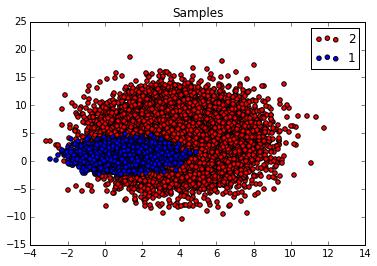

In [46]:
# Load training data
fp = open(SAMPLE_FILES[0], 'rb')
samples_1 = np.loadtxt(fp, dtype='float')
fp = open(SAMPLE_FILES[1], 'rb')
samples_2 = np.loadtxt(fp, dtype='float')
# Plot
plt.scatter(samples_2[:, 0], samples_2[:, 1], c='r', label='2')
plt.scatter(samples_1[:, 0], samples_1[:, 1], c='b', label='1')
plt.title('Samples')
plt.legend()
plt.show()

In [47]:
# Get distributions
dist_1 = getMaximumLikelihood(samples_1[: int(len(samples_1)*SUBSAMPLE_PERCENT)])
dist_2 = getMaximumLikelihood(samples_2[: int(len(samples_2)*SUBSAMPLE_PERCENT)])
print('Distribution 1:', dist_1)
print('Distribution 2:', dist_2)

Distribution 1: mu=[ 1.00140639  0.98932602], covar=[[ 1.01769271  0.        ]
 [ 0.          1.01139115]], prior=1.0
Distribution 2: mu=[ 3.99775083  3.97315171], covar=[[  4.00194062   0.        ]
 [  0.          15.98997553]], prior=1.0


Confusion matrix (actual, predicted)
[[ 9957.    43.]
 [ 1771.  8229.]]
Total Error: 0.0907


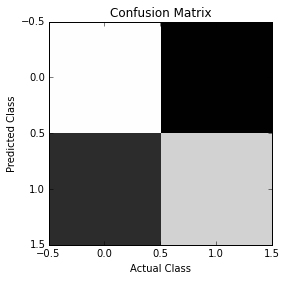

In [48]:
# Evaluate performance
dists = [dist_1, dist_2]
samples = [samples_1, samples_2]
results = np.zeros((len(samples), len(dists)))
for i in range(len(samples)):
    for sample in samples[i]:
        c = getClass(sample, dists)
        results[i, dists.index(c)] += 1
    pass

# Show confusion matrix
print('Confusion matrix (actual, predicted)')
print(results)
print('Total Error:', 1.0 - np.trace(results)/np.sum(results))
# Visual representation
plt.title('Confusion Matrix')
plt.xlabel('Actual Class')
plt.ylabel('Predicted Class')
plt.imshow(results, cmap='gray', interpolation='nearest', clim=[0, 10000])
plt.show()